In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.metrics import roc_auc_score, auc
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("C:\\Users\\pedro\\OneDrive\\Ambiente de Trabalho\\Projetos\\Livro\\Chapter_1_cleaned_data.csv")

In [3]:
features_response = df.columns.tolist()

In [46]:
print("Primeiras 5 características:", features_response[:5])
print("Últimas 5 características:", features_response[-5:])

Primeiras 5 características: ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1']
Últimas 5 características: ['PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


Algumas colunas são removidas do dataset por não contribuírem para a análise ou modelagem

In [6]:
remove_itens = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','EDUCATION_CAT', 'graduate school', 'high school', 'none','others', 'university']

In [7]:
features_response = [item for item in features_response if item not in remove_itens]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


O mapa de calor exibe as correlações entre as variáveis do dataset

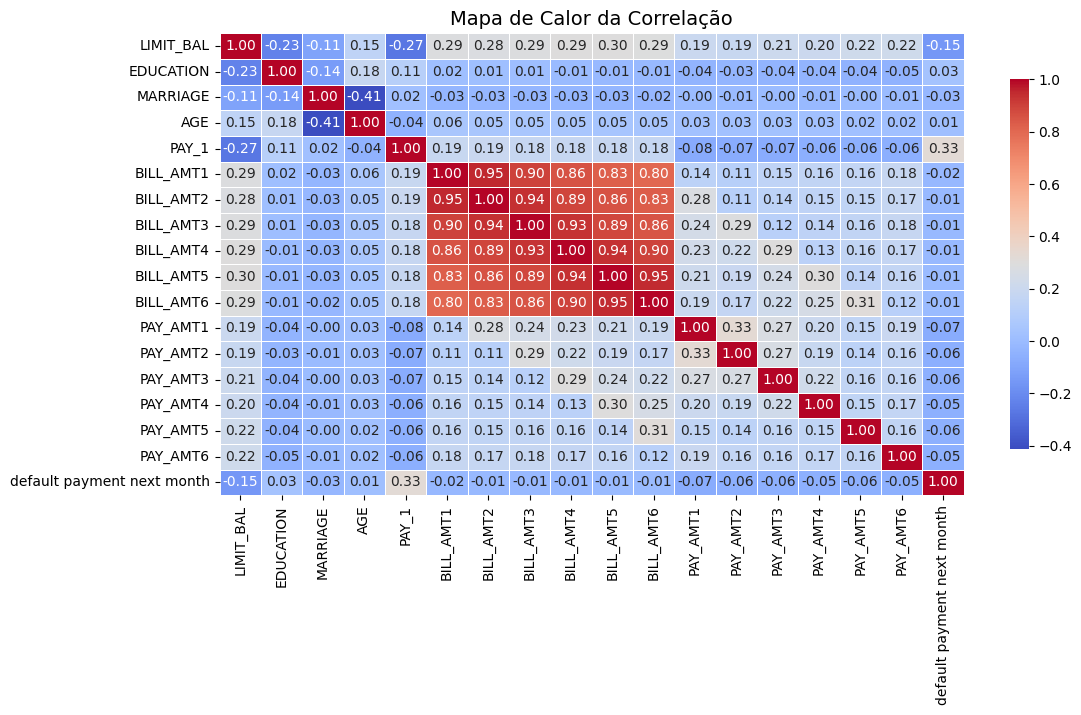

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Mapa de Calor da Correlação", fontsize=14)
plt.show()

Seleção de características univariada - Teste F ANOVA

In [10]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [11]:
[f_stat, f_p_value] = f_classif(X, y)

Aqui, o teste F para avaliar a relevância estatística das características contínuas na predição
- F-Statistic: Mede a variância explicada pela característica.
- P-value: Indica se a característica é estatisticamente significativa.

In [12]:
f_test_df = pdf_test_df = pd.DataFrame({'Feature':features_response[:-1],
    'F statistic':f_stat,
    'p value':f_p_value}
)
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


VIsualizando o relacionamento entra as caracteristicas e a resposta

In [13]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

np.float64(0.2217971797179718)

Média de variável de resposta por grupos da característica PAY_1

In [14]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month': 'mean'})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


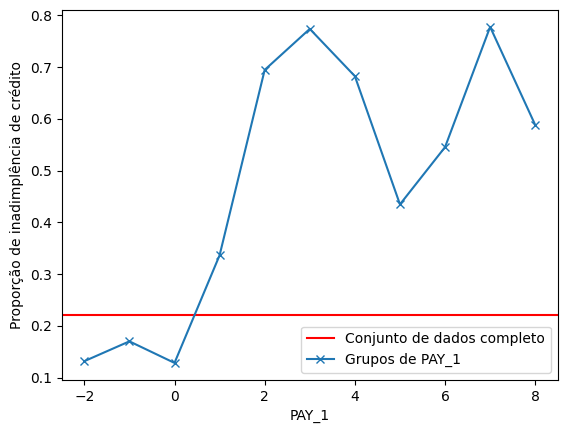

In [15]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporção de inadimplência de crédito')
axes.legend(['Conjunto de dados completo', 'Grupos de PAY_1'])
plt.show()


Variável LIMIT_BAL

In [16]:
pos_mask = y == 1
neg_mask = y == 0

In [17]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


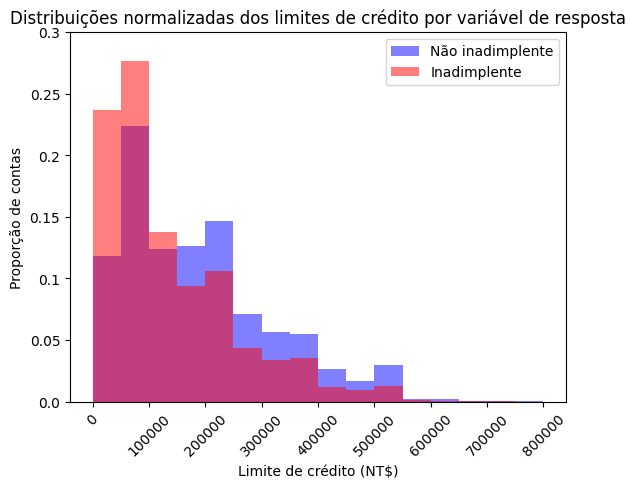

In [18]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de crédito (NT$)')
axes.set_ylabel('Proporção de contas')
y_ticks = axes.get_yticks()
axes.set_yticks(y_ticks)
axes.set_yticklabels(np.round(y_ticks * 50000, 2))
axes.legend(['Não inadimplente', 'Inadimplente'])
axes.set_title('Distribuições normalizadas dos limites de crédito por variável de resposta')
plt.show()


Taxas de inadimplência dentro de grupos de valores PAY_1 como probabilidades de não pagamento

In [19]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [20]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p, q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529] [0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


Razão de possibilidades de p e q.

In [21]:
odds_ratio = p / q
odds_ratio

array([0.15162791, 0.20482215, 0.14717742, 0.50693161, 2.27548209,
       3.42424242, 2.15      , 0.76923077, 1.2       , 3.5       ,
       1.42857143])

In [22]:
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [23]:
group_by_pay_mean_y.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Logaritmo das chances dos valores da característica

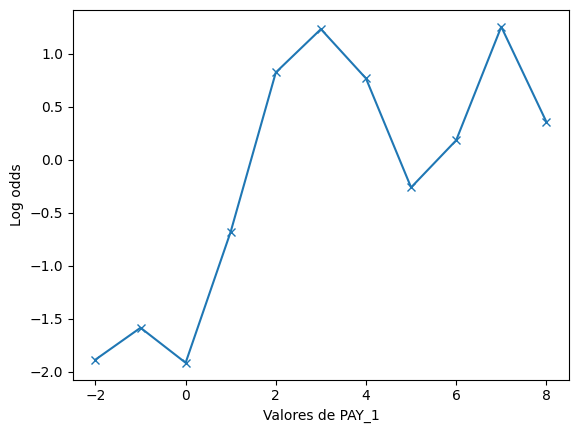

In [24]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.xlabel('Valores de PAY_1')
plt.ylabel('Log odds')
plt.show()

Ajustando o modelo de regressão logística, com a divisão de treino 80/20 das variáveis que tem mais correlação com a variável de resposta

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['PAY_1', 'LIMIT_BAL']].values,
    df['default payment next month'].values,
    test_size=0.2,
    random_state=24
)

In [26]:
example_lr = LogisticRegression(solver='liblinear')

In [27]:
example_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
y_pred = example_lr.predict(X_test)

In [29]:
y_pred_proba = example_lr.predict_proba(X_test)

In [30]:
print(example_lr.coef_, example_lr.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [31]:
np.ones((X_test.shape[0], 1)).shape

(5333, 1)

In [32]:
ones_and_features = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
ones_and_features

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [33]:
intercept_and_coefs = np.concatenate([example_lr.intercept_.reshape(1,1), example_lr.coef_], axis=1)
intercept_and_coefs

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [34]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_pred_proba_manual = sigmoid(X_lin_comb)

In [36]:
y_pred_manual = y_pred_proba_manual >= 0.5

In [40]:
y_pred_proba_manual.shape

(1, 5333)

In [41]:
y_test.shape

(5333,)

In [42]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

np.float64(0.627207450280691)

In [43]:
roc_auc_score(y_test, y_pred_proba[:,1])

np.float64(0.627207450280691)

A curva ROC ilustra a relação entre:
- Taxa de Verdadeiros Positivos (Sensibilidade).
- Taxa de Falsos Positivos.

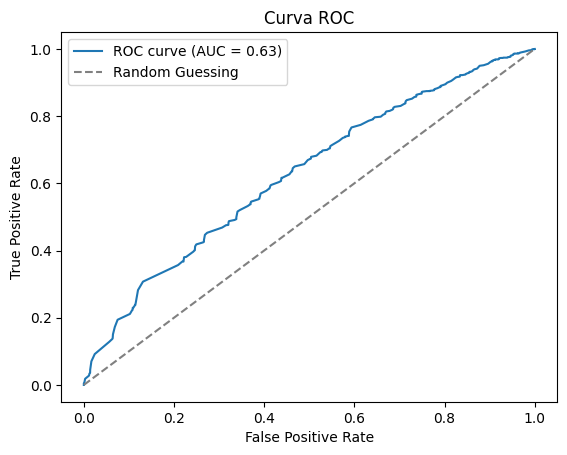

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()